In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Dropout, Lambda
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import sys
sys.executable

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'/usr/bin/python3'

In [2]:
datagen = ImageDataGenerator(rescale=1./255)


In [3]:
train_dir = 'dataset/train-numbers/'
validation_dir = 'dataset/train-numbers/'
test_dir = 'dataset/val-numbers/'

image_w = 36
image_h = 36

In [4]:
train_generator = datagen.flow_from_directory(train_dir,
                                             target_size= (image_w, image_h),
                                             batch_size = 16,
                                             class_mode = 'categorical')

Found 2300 images belonging to 10 classes.


In [5]:
validation_generator = datagen.flow_from_directory(validation_dir,
                                                  target_size = (image_w, image_h),
                                                  batch_size = 16,
                                                  class_mode = 'categorical')

Found 2300 images belonging to 10 classes.


In [6]:
def LeNet(width, height, channels, output):
    model = Sequential()
        
    #Convolution
    model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), input_shape=(width, height, channels)))
    
    #ReLU
    model.add(Activation('relu'))
    
    #Pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    # Convolution
    model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(2,2)))
    
    #ReLU
    model.add(Activation('relu'))
    
    # Pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(100))
    
    model.add(Activation('relu'))
    
    model.add(Dense(output))
    model.add(Activation('softmax'))#for categorical
    
    return model

In [7]:
EPOCH = 5
train_samples = 2300
validation_samples = 2300
batch_size = 16

In [8]:
model = LeNet(image_w, image_h, 3, 10)  #for categorical
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          51264     
_________________________________________________________________
activation_2 (Activation)    (None, 2, 2, 64)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
fla

In [9]:
train_samples

2300

In [10]:
historys = model.fit_generator(train_generator,
                    steps_per_epoch = train_samples // batch_size ,
                    epochs = EPOCH,
                    validation_data = validation_generator,
                    validation_steps = validation_samples // batch_size )

Epoch 1/5
143/143 [==============================] - 17s 116ms/step - loss: 0.0633 - acc: 0.4969 - val_loss: 0.0292 - val_acc: 0.8046
Epoch 2/5
143/143 [==============================] - 3s 22ms/step - loss: 0.0193 - acc: 0.8749 - val_loss: 0.0105 - val_acc: 0.9423
Epoch 3/5
143/143 [==============================] - 3s 21ms/step - loss: 0.0097 - acc: 0.9414 - val_loss: 0.0069 - val_acc: 0.9611
Epoch 4/5
143/143 [==============================] - 3s 21ms/step - loss: 0.0058 - acc: 0.9684 - val_loss: 0.0052 - val_acc: 0.9698
Epoch 5/5
143/143 [==============================] - 3s 20ms/step - loss: 0.0043 - acc: 0.9742 - val_loss: 0.0040 - val_acc: 0.9781


In [11]:
ls


Untitled.ipynb  dataset/


In [12]:
historys.history

{'acc': [0.4964973730297723,
  0.8747810859187471,
  0.9413309982486865,
  0.9684763573723374,
  0.9741681260945709],
 'loss': [0.06335209263733306,
  0.01926314333639713,
  0.009688682687300014,
  0.005820928809333726,
  0.004261041679591346],
 'val_acc': [0.8046328671328671,
  0.9423076923076923,
  0.9611013986013986,
  0.9698426573426573,
  0.9781468531468531],
 'val_loss': [0.02923847896444214,
  0.010456198321287422,
  0.006857623690307805,
  0.005222753405852253,
  0.0040385867979665395]}

In [13]:
img = load_img('dataset/test-numbers/w.jpg', target_size=(36, 36))

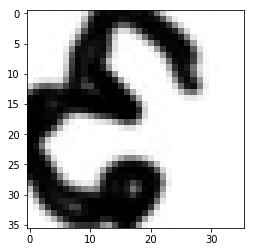

In [14]:
plt.imshow(img)
plt.show()

In [15]:
img = np.array(img)/255.
img = np.expand_dims(img, axis=0)

In [16]:
something =model.predict(img)
np.round(something,3)

array([[0.   , 0.   , 0.344, 0.007, 0.01 , 0.087, 0.545, 0.001, 0.   ,
        0.007]], dtype=float32)

In [17]:
something[0][1]
np.argmax(something)

6